In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=["target"])


In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="SGD")
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.8777 - val_loss: 0.4037
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4130 - val_loss: 0.3812
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3820 - val_loss: 0.3519
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3701 - val_loss: 0.3457
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3603 - val_loss: 0.3316
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3510 - val_loss: 0.3378
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3440 - val_loss: 0.3502
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3384 - val_loss: 0.4135
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3341 - val_loss: 0.3224
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3309 - val_loss: 0.3774

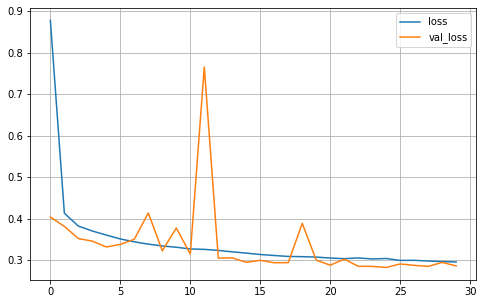

In [11]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [12]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 1ms/step - loss: 0.3108


In [18]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = tf.keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.2828 - val_loss: 0.2767
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.2826 - val_loss: 0.2766
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.2824 - val_loss: 0.2770
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.2823 - val_loss: 0.2769
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.2825 - val_loss: 0.2763
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.2822 - val_loss: 0.2765
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.2822 - val_loss: 0.2765
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.2822 - val_loss: 0.2767
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.2823 - val_loss: 0.2764
Epoch 10/10
162/162 [==============================] - 0s 886us/step - loss: 0.2983


In [19]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2825 - val_loss: 0.2764
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2823 - val_loss: 0.2765
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2822 - val_loss: 0.2769
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2822 - val_loss: 0.2764
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2821 - val_loss: 0.2776
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2822 - val_loss: 0.2768
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2820 - val_loss: 0.2776
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2820 - val_loss: 0.2766
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2818 - val_loss: 0.2765
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2818 - val_lo

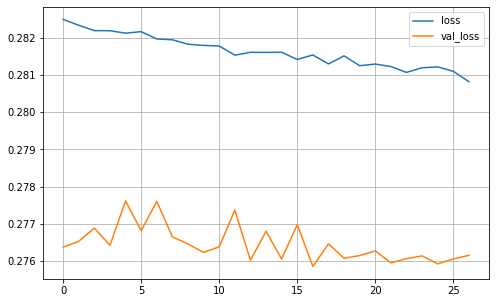

In [22]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.gca().set_ylim(0, 1)
plt.grid(True)